In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.io as pio

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


In [2]:
import cufflinks as cf

In [3]:
init_notebook_mode(connected=True)

In [4]:
cf.go_offline()

In [5]:
df = pd.read_csv("F:\\IMDb Data\\Kaggle350\\AllMoviesDetailsCleaned.csv", sep=";", parse_dates=["release_date"])

C:\Users\amir\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning:

Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.



In [6]:
df.head()

,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,production_companies_number,production_countries_number,spoken_languages_number
0,2,0,Drama|Crime,tt0094675,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,0.823904,Villealfa Filmproduction Oy,Finland,...,69.0,suomi,Released,NaN,Ariel,7.1,40,2,1,2
1,3,0,Drama|Comedy,tt0092149,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",0.47445,Villealfa Filmproduction Oy,Finland,...,76.0,English,Released,NaN,Shadows in Paradise,7.0,32,1,1,3
2,5,4000000,Crime|Comedy,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,1.698,Miramax Films,United States of America,...,98.0,English,Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,6.5,485,2,1,1
3,6,0,Action|Thriller|Crime,tt0107286,en,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",1.32287,Universal Pictures,Japan,...,110.0,English,Released,Don't move. Don't whisper. Don't even breathe.,Judgment Night,6.5,69,3,2,1
4,8,42000,Documentary,tt0825671,en,Life in Loops (A Megacities RMX),Timo Novotny labels his new project an experim...,0.054716,inLoops,Austria,...,80.0,English,Released,A Megacities remix.,Life in Loops (A Megacities RMX),6.4,4,1,1,5


In [7]:
df = df[["id","title","budget","genres","popularity","revenue","release_date"]] 
df = df.dropna(axis=0,how="any")
df = df[df.genres.str.contains("Action|Crim|Comedy")]

In [8]:
df.shape

(77133, 7)

In [9]:
df.head()

,id,title,budget,genres,popularity,revenue,release_date
0,2,Ariel,0,Drama|Crime,0.823904,0,1988-10-21
1,3,Shadows in Paradise,0,Drama|Comedy,0.47445,0,1986-10-16
2,5,Four Rooms,4000000,Crime|Comedy,1.698,4300000,1995-12-25
3,6,Judgment Night,0,Action|Thriller|Crime,1.32287,12136938,1993-10-15
6,11,Star Wars,11000000,Adventure|Action|Science Fiction,10.492614,775398007,1977-05-25


In [10]:
df["popularity"] = pd.to_numeric(df['popularity'], errors='coerce')

In [11]:
df.head()

,id,title,budget,genres,popularity,revenue,release_date
0,2,Ariel,0,Drama|Crime,0.823904,0,1988-10-21
1,3,Shadows in Paradise,0,Drama|Comedy,0.474450,0,1986-10-16
2,5,Four Rooms,4000000,Crime|Comedy,1.698000,4300000,1995-12-25
3,6,Judgment Night,0,Action|Thriller|Crime,1.322870,12136938,1993-10-15
6,11,Star Wars,11000000,Adventure|Action|Science Fiction,10.492614,775398007,1977-05-25


In [12]:
df['release_date']= pd.to_datetime(df.release_date)

In [13]:
df['year']= df.release_date.dt.year
df['month']= df.release_date.dt.month
df.head()

,id,title,budget,genres,popularity,revenue,release_date,year,month
0,2,Ariel,0,Drama|Crime,0.823904,0,1988-10-21,1988,10
1,3,Shadows in Paradise,0,Drama|Comedy,0.474450,0,1986-10-16,1986,10
2,5,Four Rooms,4000000,Crime|Comedy,1.698000,4300000,1995-12-25,1995,12
3,6,Judgment Night,0,Action|Thriller|Crime,1.322870,12136938,1993-10-15,1993,10
6,11,Star Wars,11000000,Adventure|Action|Science Fiction,10.492614,775398007,1977-05-25,1977,5


In [14]:
df["type"] = pd.np.where(df.genres.str.contains("Action"),"Action", 
                         pd.np.where(df.genres.str.contains("Crime"),"Crime", 
                                     pd.np.where(df.genres.str.contains('Comedy'), 'Comedy', 'Other')))

df.head()

,id,title,budget,genres,popularity,revenue,release_date,year,month,type
0,2,Ariel,0,Drama|Crime,0.823904,0,1988-10-21,1988,10,Crime
1,3,Shadows in Paradise,0,Drama|Comedy,0.474450,0,1986-10-16,1986,10,Comedy
2,5,Four Rooms,4000000,Crime|Comedy,1.698000,4300000,1995-12-25,1995,12,Crime
3,6,Judgment Night,0,Action|Thriller|Crime,1.322870,12136938,1993-10-15,1993,10,Action
6,11,Star Wars,11000000,Adventure|Action|Science Fiction,10.492614,775398007,1977-05-25,1977,5,Action


In [15]:
df = df[(df.year < 2018) ]

In [16]:
df.head()

,id,title,budget,genres,popularity,revenue,release_date,year,month,type
0,2,Ariel,0,Drama|Crime,0.823904,0,1988-10-21,1988,10,Crime
1,3,Shadows in Paradise,0,Drama|Comedy,0.474450,0,1986-10-16,1986,10,Comedy
2,5,Four Rooms,4000000,Crime|Comedy,1.698000,4300000,1995-12-25,1995,12,Crime
3,6,Judgment Night,0,Action|Thriller|Crime,1.322870,12136938,1993-10-15,1993,10,Action
6,11,Star Wars,11000000,Adventure|Action|Science Fiction,10.492614,775398007,1977-05-25,1977,5,Action


In [17]:
data = pd.DataFrame(df.groupby(["year","type"], sort=True)['popularity'].mean()).reset_index()

In [18]:
data.head()

,year,type,popularity
0,1890,Comedy,0.005043
1,1891,Action,0.020775
2,1892,Comedy,0.140590
3,1894,Comedy,0.000185
4,1894,Crime,0.002960


In [19]:
df1 = df[df.revenue !=0]

In [20]:
df1["revenue"] = df1["revenue"]/1000000

In [21]:
data1= pd.DataFrame(df1.groupby(["year","type"],sort=True)['revenue'].mean()).reset_index()

In [22]:
df1.head()

,id,title,budget,genres,popularity,revenue,release_date,year,month,type
2,5,Four Rooms,4000000,Crime|Comedy,1.698000,4.300000,1995-12-25,1995,12,Crime
3,6,Judgment Night,0,Action|Thriller|Crime,1.322870,12.136938,1993-10-15,1993,10,Action
6,11,Star Wars,11000000,Adventure|Action|Science Fiction,10.492614,775.398007,1977-05-25,1977,5,Action
8,13,Forrest Gump,55000000,Comedy|Drama|Romance,10.351236,677.945399,1994-06-07,1994,6,Comedy
11,16,Dancer in the Dark,12800000,Drama|Crime|Music,2.106217,40.031879,2000-05-17,2000,5,Crime


In [23]:
data1.head()

,year,type,revenue
0,1916,Action,8.000
1,1918,Comedy,8.000
2,1921,Comedy,2.500
3,1925,Comedy,2.500
4,1925,Crime,0.704


In [24]:
df2= df[df.budget !=0] 
df2["budget"] = df2["budget"]/1000000 

In [25]:
df2.head()

,id,title,budget,genres,popularity,revenue,release_date,year,month,type
2,5,Four Rooms,4.0,Crime|Comedy,1.698000,4300000,1995-12-25,1995,12,Crime
6,11,Star Wars,11.0,Adventure|Action|Science Fiction,10.492614,775398007,1977-05-25,1977,5,Action
8,13,Forrest Gump,55.0,Comedy|Drama|Romance,10.351236,677945399,1994-06-07,1994,6,Comedy
11,16,Dancer in the Dark,12.8,Drama|Crime|Music,2.106217,40031879,2000-05-17,2000,5,Crime
13,18,The Fifth Element,90.0,Adventure|Fantasy|Action|Thriller|Science Fiction,9.233786,263920180,1997-07-05,1997,7,Action


In [26]:
data2 = pd.DataFrame(df2.groupby(["year","type"],sort=True)['budget'].mean()).reset_index()

In [27]:
data2.head()

,year,type,budget
0,1903,Action,0.000150
1,1904,Comedy,0.007500
2,1912,Comedy,0.000008
3,1914,Comedy,0.000023
4,1915,Comedy,0.002521


In [28]:
data3= pd.DataFrame(df.groupby(["year","type"],sort=True)['id'].count()).reset_index()

In [29]:
data3.head()

,year,type,id
0,1890,Comedy,1
1,1891,Action,1
2,1892,Comedy,1
3,1894,Comedy,3
4,1894,Crime,1


In [30]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

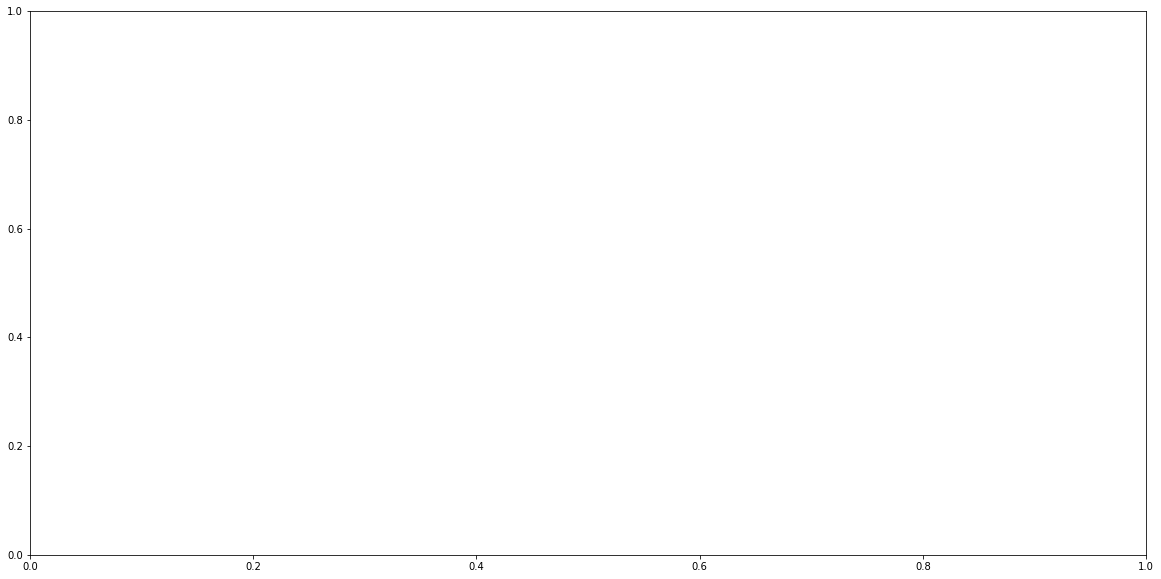

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)

In [36]:
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="left")

[Text(0,0,'0.0'),
 Text(0.2,0,'0.2'),
 Text(0.4,0,'0.4'),
 Text(0.6,0,'0.6'),
 Text(0.8,0,'0.8'),
 Text(1,0,'1.0')]

In [42]:
sns.pointplot(x=data3["year"], y=data3["id"], hue=data3["type"], data=data3,
                join=True, palette={"Crime": "#2ecc71", "Action": "#34495e", 'Comedy': "#34495e"},ax=ax) 

ax.set(xlabel='year', ylabel='Count',title="Count By year")

[Text(17.2,0.5,'Count'), Text(0.5,17.2,'year'), Text(0.5,1,'Count By year')]

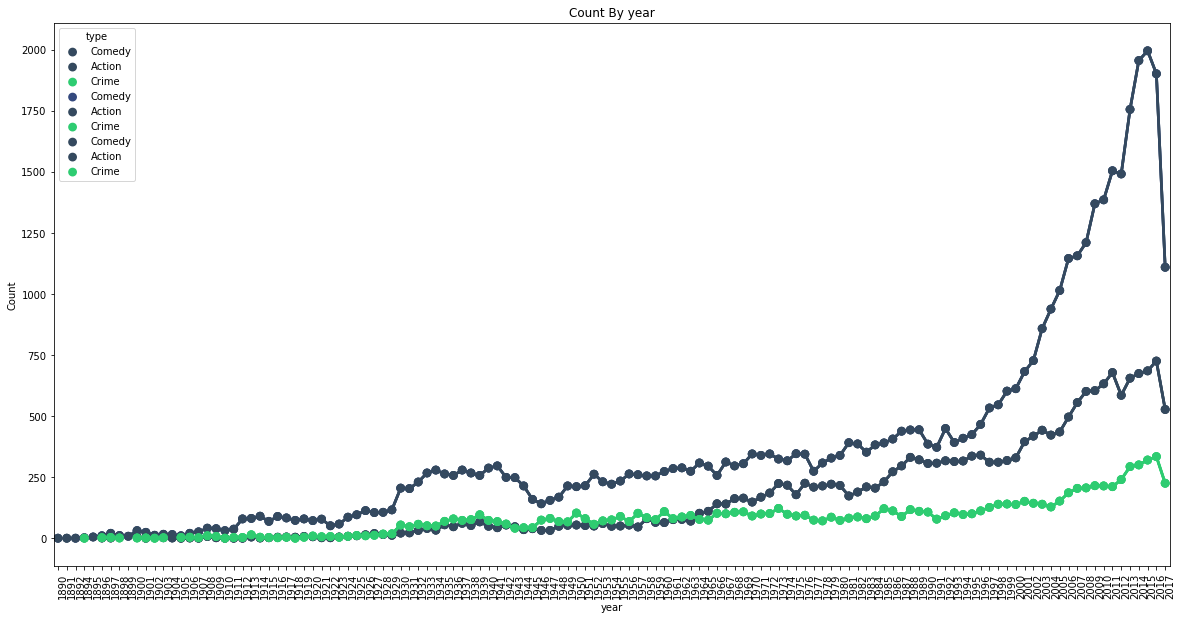

In [43]:
fig

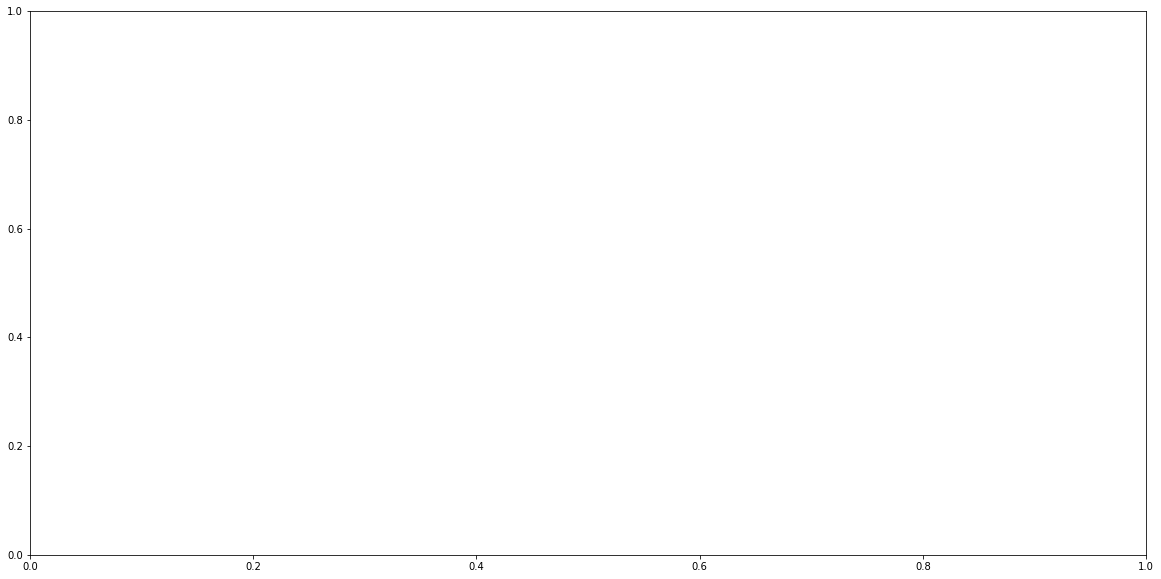

In [65]:
fig, ax1 = plt.subplots()
fig.set_size_inches(20, 10)

In [66]:
ax1.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="left")
sns.pointplot(x=data1["year"], y=data1["revenue"],hue=data1["type"], 
               palette={"Action": "#2ecc71", "Crime": "#34495e"},data=data1,join=True,ax=ax1)
ax1.set(xlabel='year', ylabel='Avearage revenue',title="Average revenue By year")

[Text(3.2,0.5,'Avearage revenue'),
 Text(0.5,3.2,'year'),
 Text(0.5,1,'Average revenue By year')]

In [67]:
fig1

NameError: name 'fig1' is not defined

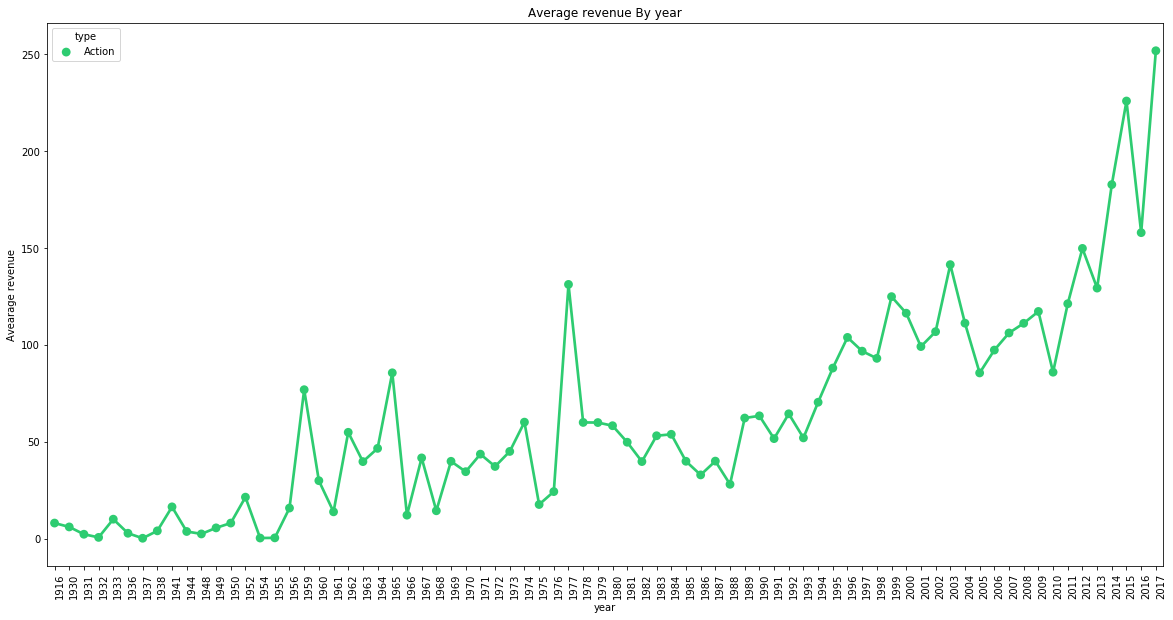

In [68]:
fig

[Text(0,0.5,'Avearage budget'),
 Text(0.5,0,'year'),
 Text(0.5,1,'Average budget By year')]

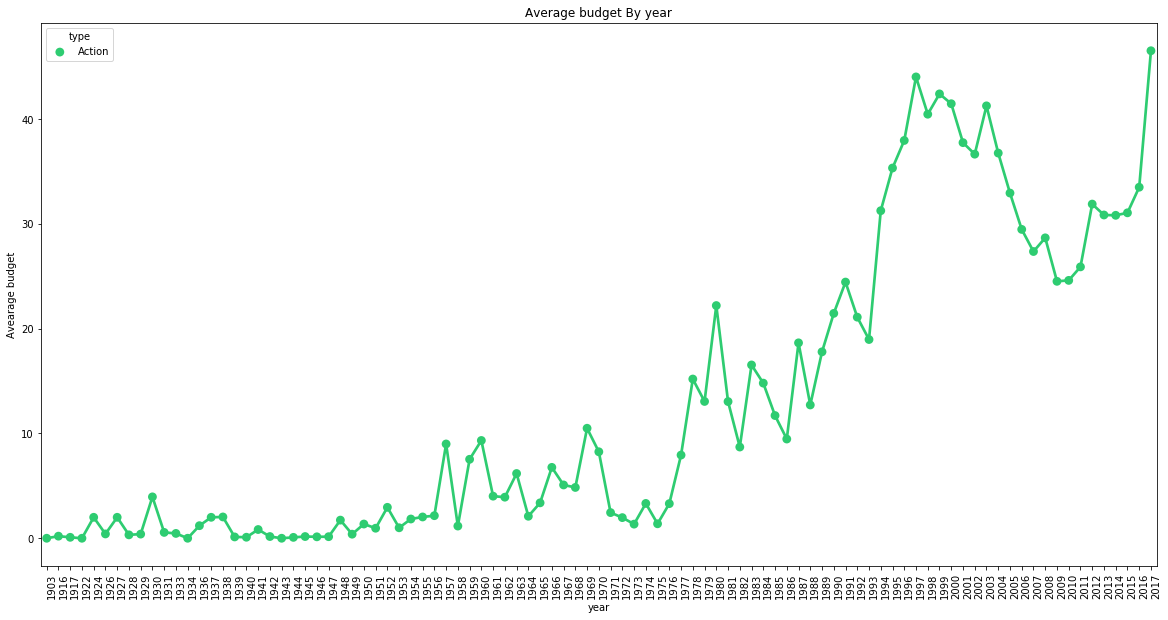

In [70]:
fig, ax2 = plt.subplots()
fig.set_size_inches(20, 10)
ax2.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="left")
sns.pointplot(x=data2["year"], y=data2["budget"],hue=data2["type"],
               palette={"Action": "#2ecc71", "Crime": "#34495e"},data=data2,join=True,ax=ax2)
ax2.set(xlabel='year', ylabel='Avearage budget',title="Average budget By year")




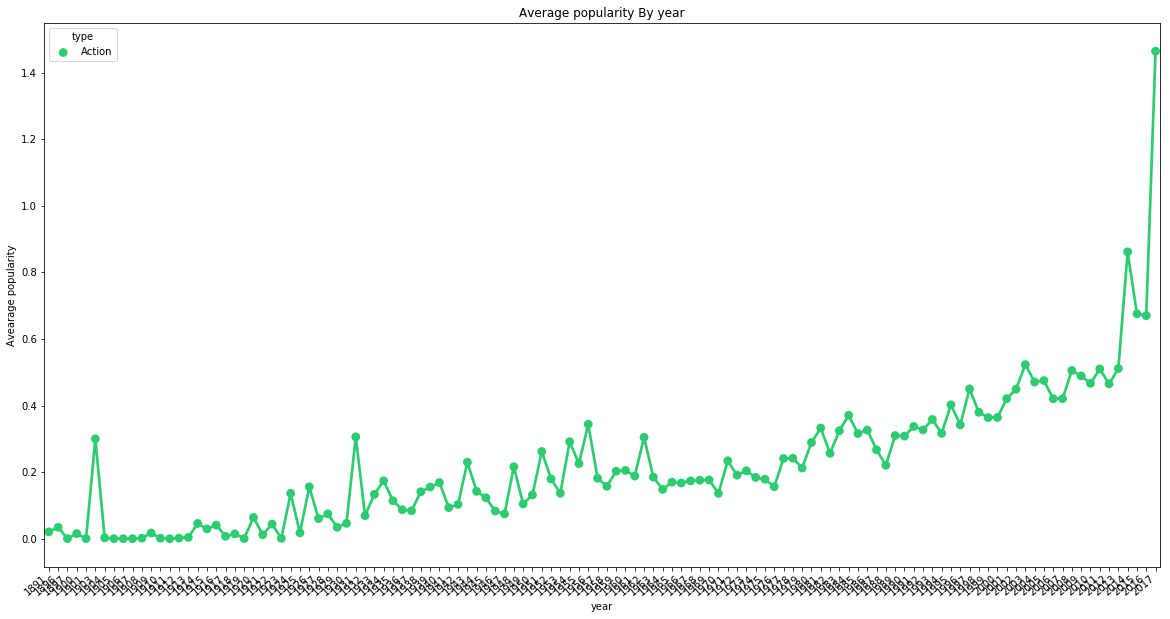

In [71]:
fig, ax0 = plt.subplots()
fig.set_size_inches(20, 10)
ax0.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.pointplot(x=data["year"], y=data["popularity"],hue=data["type"],
               palette={"Action": "#2ecc71", "Crime": "#34495e"}, data=data,join=True,ax=ax0)
ax0.set(xlabel='year', ylabel='Avearage popularity',title="Average popularity By year")
plt.show()

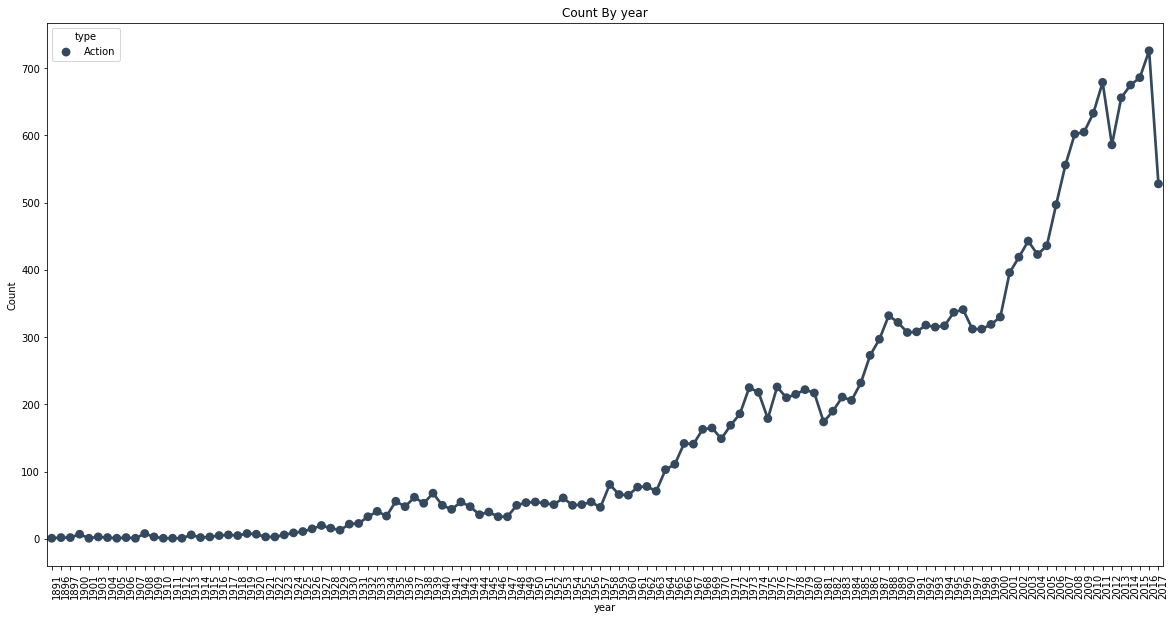

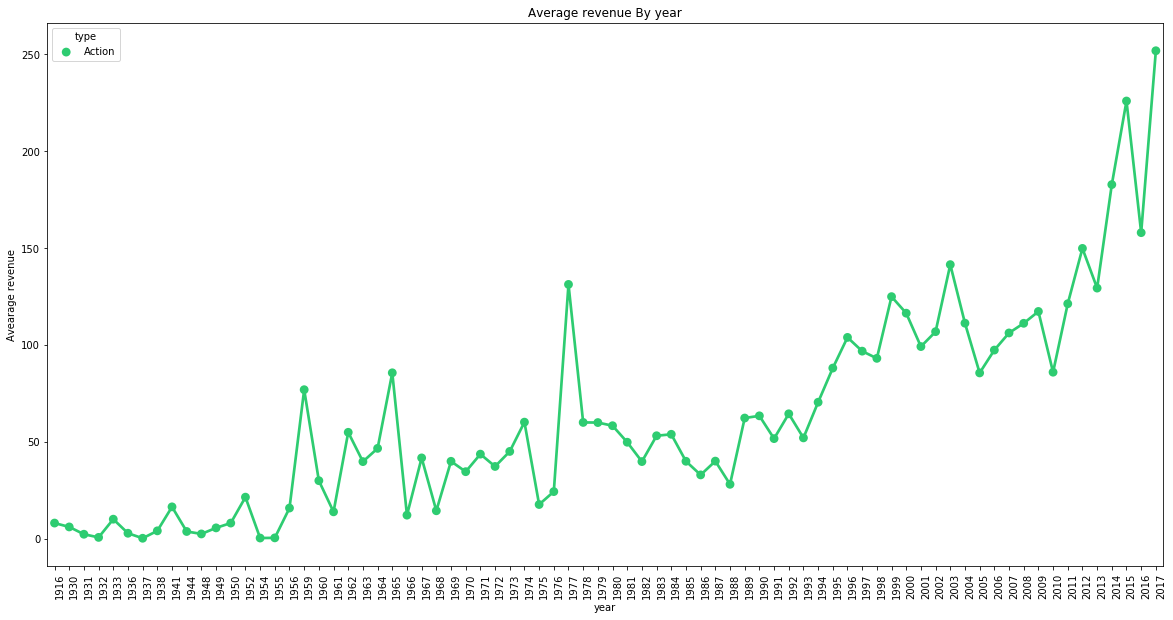

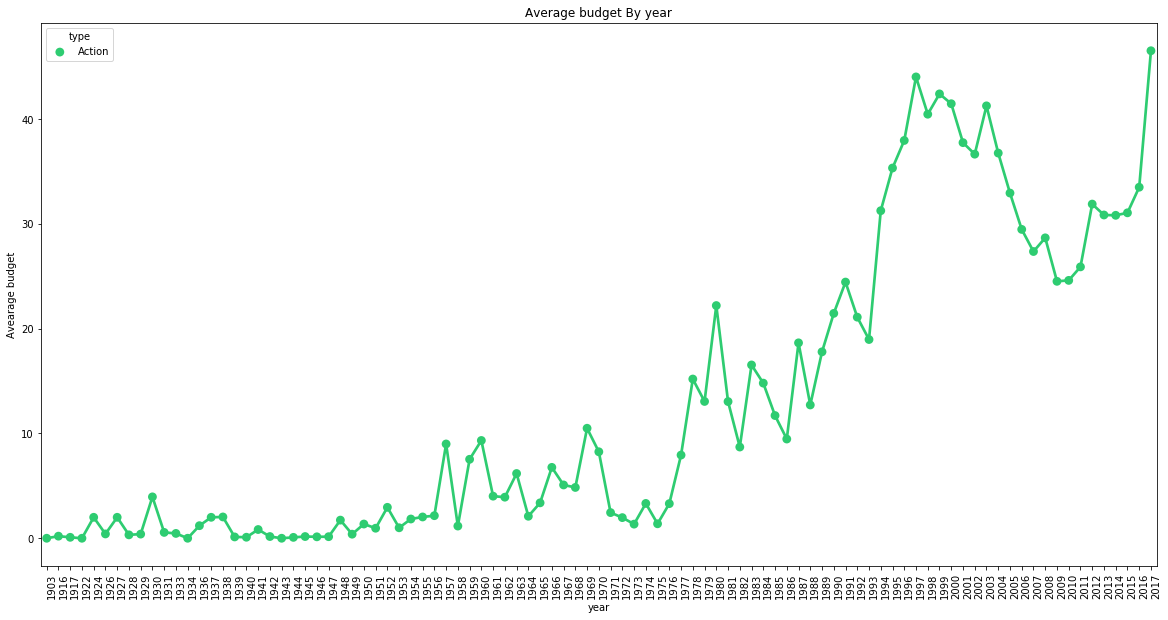

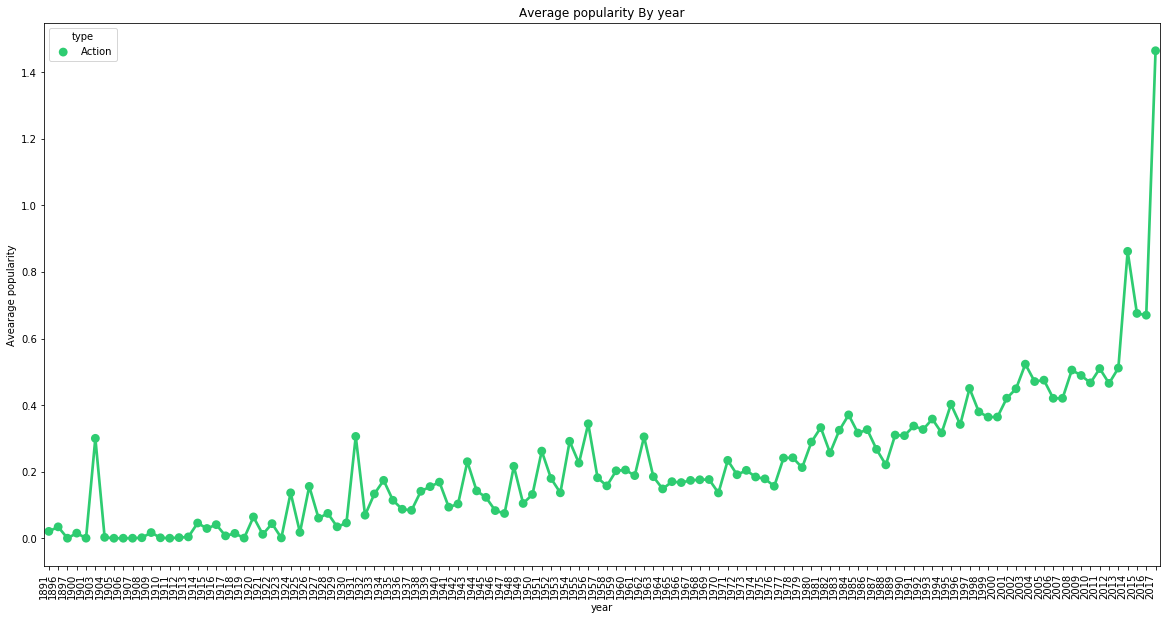

In [73]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="left")

sns.pointplot(x=data3["year"], y=data3["id"], hue=data3["type"], data=data3,
                join=True, palette={"Crime": "#2ecc71", "Action": "#34495e"},ax=ax) 

ax.set(xlabel='year', ylabel='Count',title="Count By year")


fig, ax1 = plt.subplots()
fig.set_size_inches(20, 10)

ax1.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="left")
sns.pointplot(x=data1["year"], y=data1["revenue"],hue=data1["type"], 
               palette={"Action": "#2ecc71", "Crime": "#34495e"},data=data1,join=True,ax=ax1)
ax1.set(xlabel='year', ylabel='Avearage revenue',title="Average revenue By year")

fig, ax2 = plt.subplots()
fig.set_size_inches(20, 10)
ax2.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="left")
sns.pointplot(x=data2["year"], y=data2["budget"],hue=data2["type"],
               palette={"Action": "#2ecc71", "Crime": "#34495e"},data=data2,join=True,ax=ax2)
ax2.set(xlabel='year', ylabel='Avearage budget',title="Average budget By year")


fig, ax0 = plt.subplots()
fig.set_size_inches(20, 10)
ax0.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
sns.pointplot(x=data["year"], y=data["popularity"],hue=data["type"],
               palette={"Action": "#2ecc71", "Crime": "#34495e"}, data=data,join=True,ax=ax0)
ax0.set(xlabel='year', ylabel='Avearage popularity',title="Average popularity By year")
plt.show()